In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
from google.colab import drive

# STEP 1: Mount Google Drive
drive.mount('/content/drive')

# Define dataset paths in Google Drive
drive_path = "/content/drive/MyDrive/GRAPES"  # Change this if needed

# Define extraction path in Colab
extract_path = "/content"

# Ensure destination exists
os.makedirs(extract_path, exist_ok=True)

# Function to extract zip files
def extract_zip(zip_file, dest_folder):
    zip_path = os.path.join(drive_path, zip_file)
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dest_folder)
        print(f"Extracted: {zip_file}")
    else:
        print(f"❌ {zip_file} not found in Google Drive!")

# STEP 2: Extract all three datasets
extract_zip("grapes.zip", extract_path)






# Check extracted folders
print("Extracted folders:", os.listdir(extract_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted: grapes.zip
Extracted folders: ['.config', 'grapes', 'drive', 'sample_data']


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/grapes/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)


Found 7220 files belonging to 4 classes.


In [5]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/grapes/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,

    verbose=True,
)


Found 1805 files belonging to 4 classes.


In [6]:
class_name=validation_set.class_names
class_name

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [7]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[156. 156. 158.]
   [153. 153. 155.]
   [154. 154. 156.]
   ...
   [107.  99.  97.]
   [112. 104. 102.]
   [101.  93.  91.]]

  [[160. 160. 162.]
   [158. 158. 160.]
   [159. 159. 161.]
   ...
   [137. 129. 127.]
   [139. 131. 129.]
   [116. 108. 106.]]

  [[161. 161. 163.]
   [159. 159. 161.]
   [160. 160. 162.]
   ...
   [122. 114. 112.]
   [112. 104. 102.]
   [126. 118. 116.]]

  ...

  [[169. 168. 164.]
   [168. 167. 163.]
   [168. 167. 163.]
   ...
   [120. 110. 108.]
   [111. 101.  99.]
   [113. 103. 101.]]

  [[167. 166. 162.]
   [165. 164. 160.]
   [163. 162. 158.]
   ...
   [124. 114. 112.]
   [117. 107. 105.]
   [122. 112. 110.]]

  [[176. 175. 171.]
   [171. 170. 166.]
   [165. 164. 160.]
   ...
   [121. 111. 109.]
   [121. 111. 109.]
   [132. 122. 120.]]]


 [[[156. 145. 139.]
   [166. 155. 149.]
   [152. 141. 135.]
   ...
   [180. 167. 161.]
   [164. 151. 145.]
   [168. 155. 149.]]

  [[178. 167. 161.]
   [178. 167. 161.]
   [158. 147. 141.]
   ...
   [164. 1

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input

model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # Define input explicitly
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:

model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=4,activation='softmax'))

In [21]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,187,824 (118.97 MB)

 Trainable params: 31,187,824 (118.97 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 87s 276ms/step - accuracy: 0.6270 - loss: 1.0667 - val_accuracy: 0.9047 - val_loss: 0.2613
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 100s 185ms/step - accuracy: 0.9350 - loss: 0.1760 - val_accuracy: 0.9291 - val_loss: 0.1880
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.9622 - loss: 0.0992 - val_accuracy: 0.9789 - val_loss: 0.0685
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 44s 193ms/step - accuracy: 0.9710 - loss: 0.0763 - val_accuracy: 0.9734 - val_loss: 0.0719
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 81s 191ms/step - accuracy: 0.9806 - loss: 0.0505 - val_accuracy: 0.9684 - val_loss: 0.0872
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 46s 205ms/step - accuracy: 0.9838 - loss: 0.0440 - val_accuracy: 0.9756 - val_loss: 0.0720
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 46s 205ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9928 - val_loss: 0.0240
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 81s 203ms/step - accuracy: 0.9966 - loss: 

In [24]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.9943 - loss: 0.0153


In [25]:
model.save("trained_model_grapes.keras")

In [26]:
#Recording History in json
import json
with open("training_hist (1).json","w") as f:
    json.dump(training_history.history,f)

In [27]:
training_history.history['val_accuracy']

[0.9047091603279114,
 0.9290858507156372,
 0.9789473414421082,
 0.9734072089195251,
 0.9684210419654846,
 0.9756232500076294,
 0.9927977919578552,
 0.9822714924812317,
 0.9950138330459595,
 0.9817174673080444]

In [28]:
import tensorflow as tf
import json
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
model_path = "/content/drive/MyDrive/trained_model.keras"
history_path = "/content/drive/MyDrive/training_hist.json"

# Save the trained model
model.save(model_path)
print(f"Model saved to {model_path}")

# Save training history
with open(history_path, 'w') as f:
    json.dump(training_history.history, f)

print(f"Training history saved to {history_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/trained_model.keras
Training history saved to /content/drive/MyDrive/training_hist.json


In [29]:

import tensorflow as tf
import json
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define original paths in Google Drive
drive_model_path = "/content/drive/MyDrive/trained_model.keras"
drive_history_path = "/content/drive/MyDrive/training_hist.json"

# Define local paths in Colab
local_model_path = "/content/trained_model_grapes.keras"
local_history_path = "/content/training_hist.json"

# Copy files from Drive to local Colab
shutil.copy(drive_model_path, local_model_path)
shutil.copy(drive_history_path, local_history_path)

# Load the model from local path
model = tf.keras.models.load_model(local_model_path)
print("✅ Model loaded from local /content directory!")

# Load training history from local path
with open(local_history_path, 'r') as f:
    loaded_history = json.load(f)
print("✅ Training history loaded from local /content directory!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model loaded from local /content directory!
✅ Training history loaded from local /content directory!


In [30]:
train_loss,train_acc = model.evaluate(training_set)

226/226 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9943 - loss: 0.0155


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


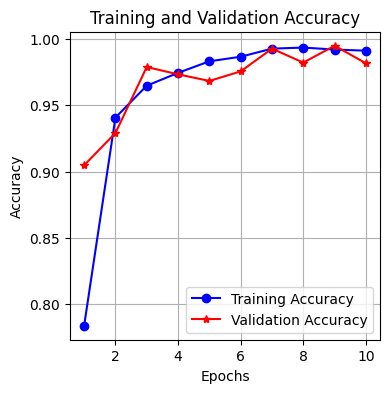

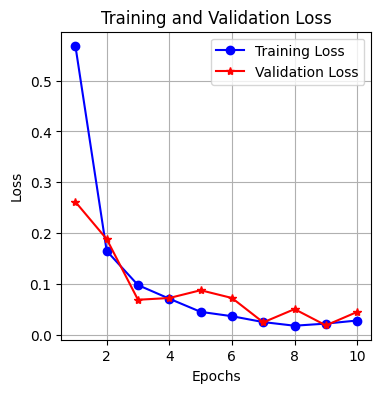

In [31]:
import json
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your JSON file (update with actual path)
json_file_path = '/content/drive/My Drive/training_hist.json'

# Load training history
with open(json_file_path, 'r') as f:
    history = json.load(f)

# Extract metrics
epochs = range(1, len(history['accuracy']) + 1)

# Plot Accuracy
plt.figure(figsize=(4, 4))
plt.plot(epochs, history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(4, 4))
plt.plot(epochs, history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [33]:
model  = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.keras')

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/grapes/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1805 files belonging to 4 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step


(array([[9.99998331e-01, 4.82524058e-07, 9.30136594e-07, 2.44235792e-07],
        [9.99887586e-01, 1.02351521e-04, 8.92936441e-06, 1.16138506e-06],
        [9.99999762e-01, 4.67045034e-08, 1.85962463e-07, 1.41606334e-12],
        ...,
        [1.19509905e-05, 9.92764182e-09, 1.24862225e-07, 9.99987960e-01],
        [4.34889407e-05, 1.93711251e-08, 1.16329386e-06, 9.99955297e-01],
        [8.15823114e-07, 1.18915366e-08, 1.52928203e-06, 9.99997616e-01]],
       dtype=float32),
 (1805, 4))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(1805,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1805, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1805,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [41]:
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                           precision    recall  f1-score   support

                         Grape__Black_rot       0.95      1.00      0.97       472
              Grape__Esca_(Black_Measles)       1.00      0.97      0.99       480
Grape__Leaf_blight_(Isariopsis_Leaf_Spot)       0.99      0.97      0.98       430
                            Grap__healthy       1.00      0.98      0.99       423

                                 accuracy                           0.98      1805
                                macro avg       0.98      0.98      0.98      1805
                             weighted avg       0.98      0.98      0.98      1805



In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[471,   1,   0,   0],
       [ 11, 468,   1,   0],
       [ 12,   0, 417,   1],
       [  4,   0,   3, 416]])

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

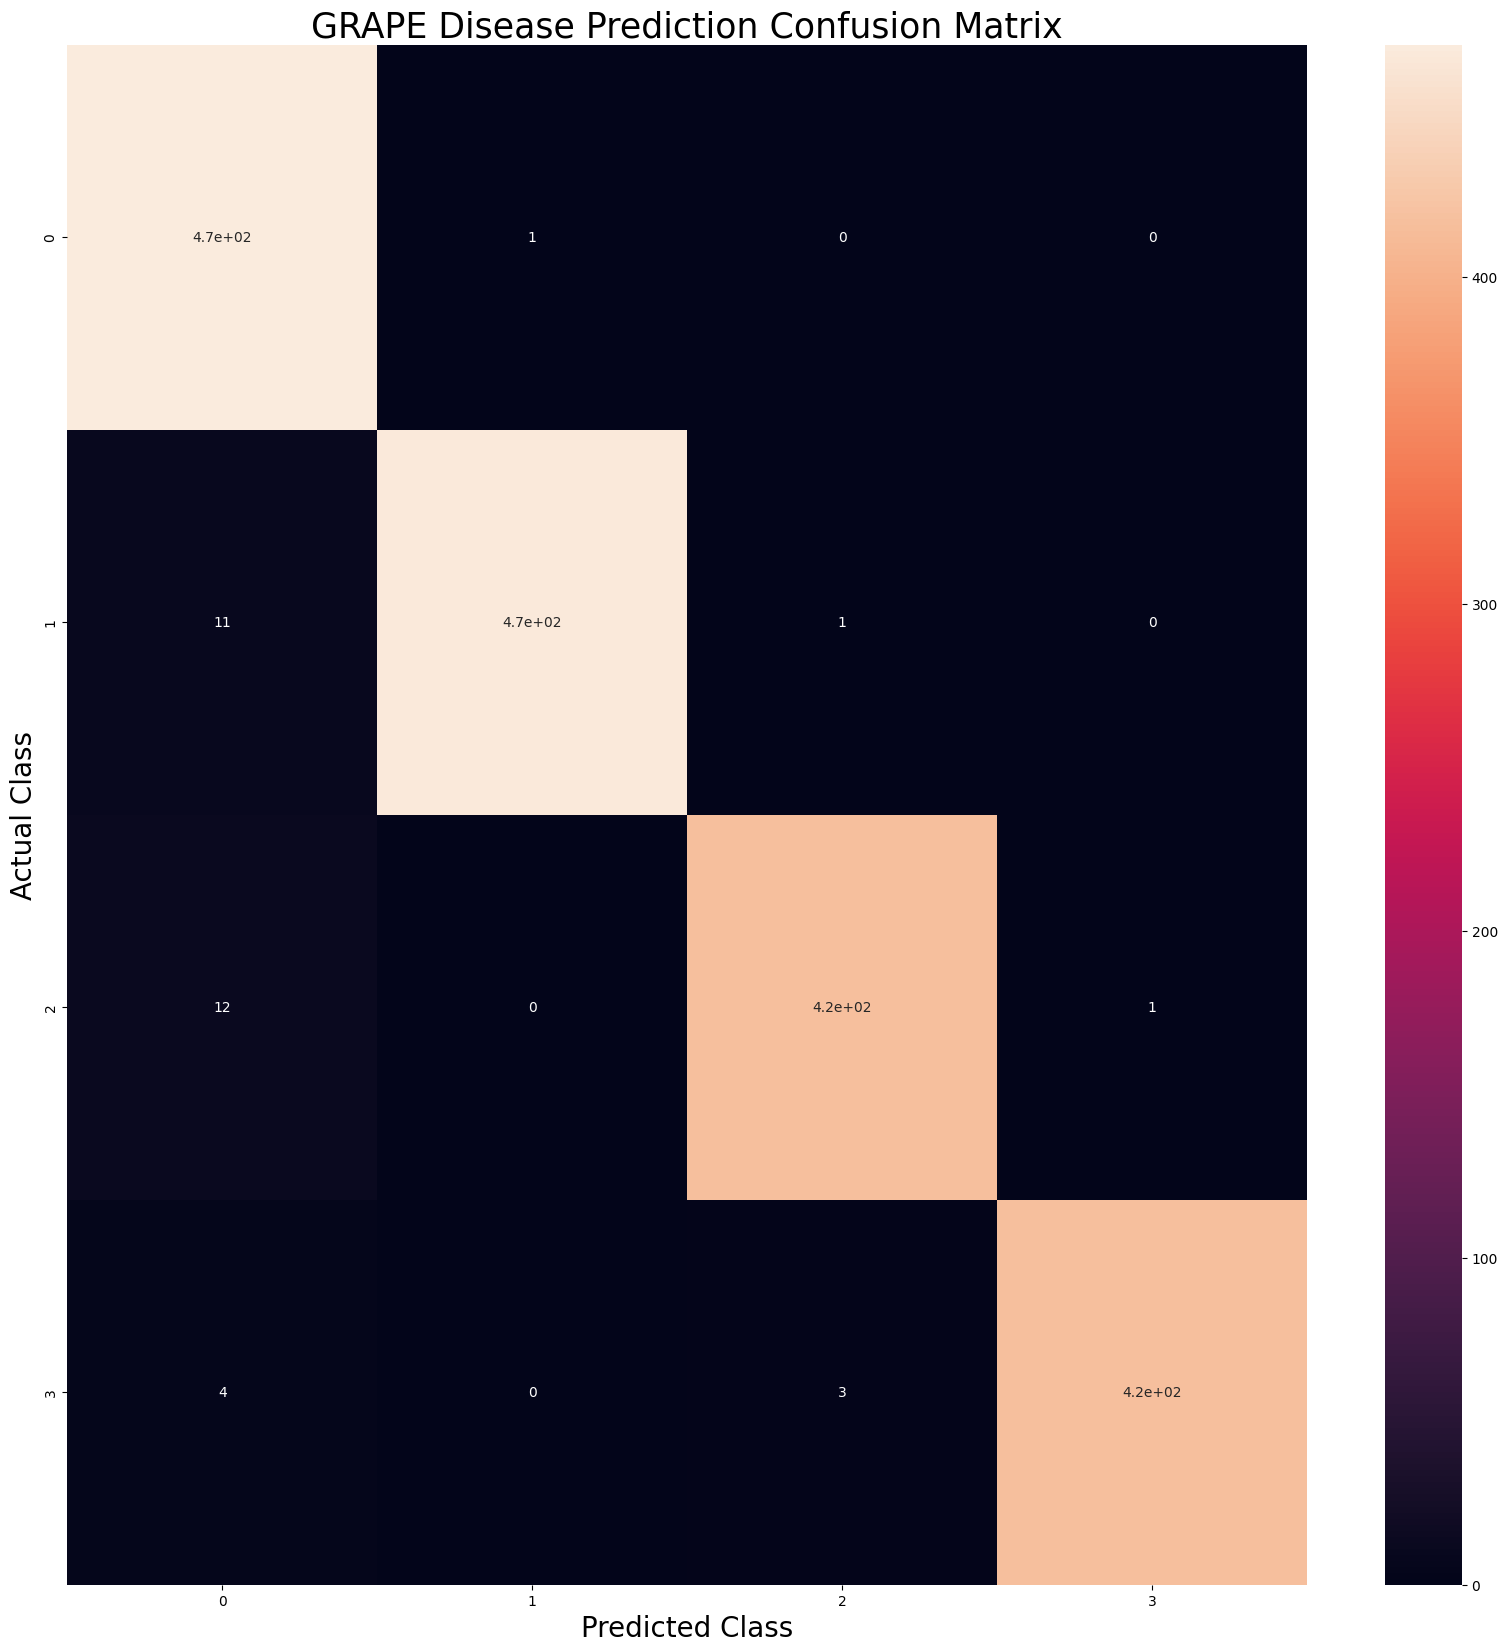

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("GRAPE Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      27,649,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,563,474 (356.92 MB)

 Trainable params: 31,187,824 (118.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,375,650 (237.94 MB)

In [50]:
!pip install opencv-python

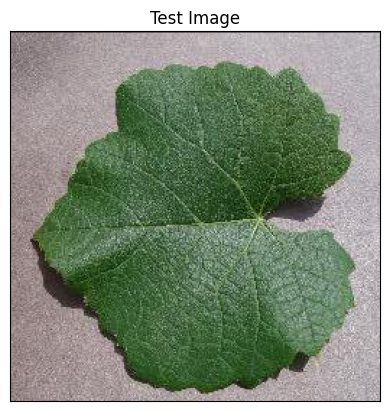

In [51]:
import cv2
image_path = "/content/grapes/test/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [52]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 256, 256, 3)


In [53]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(array([[1.5589093e-06, 5.4383440e-09, 7.2023818e-07, 9.9999774e-01]],
       dtype=float32),
 (1, 4))

In [54]:
result_index = np.argmax(prediction)
result_index

np.int64(3)

In [55]:
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

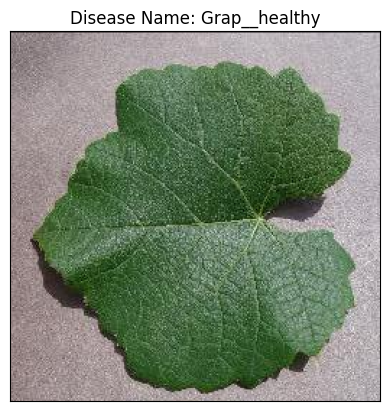

In [56]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
model  = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


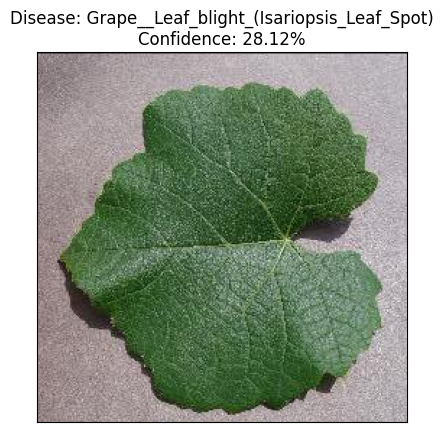

Predicted Class: Grape__Leaf_blight_(Isariopsis_Leaf_Spot)
Confidence Score: 28.12%
Image Path: /content/grapes/test/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG


In [59]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model from Google Drive
model_path = "/content/drive/MyDrive/trained_model.keras"
model = tf.keras.models.load_model(model_path)


# Define the image path (update it if needed)
image_path = "/content/grapes/test/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG"

# Load and preprocess the image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

# Load image for model prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to batch
input_arr /= 255.0  # Normalize if required by the model

# Make prediction
prediction = model.predict(input_arr)

# Get the highest confidence index and corresponding class
result_index = np.argmax(prediction)
confidence = float(np.max(prediction))  # Extract confidence score

# Define class names
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

# Get the predicted disease name
model_prediction = class_name[result_index]

# Display the prediction result
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2%}")
plt.xticks([])
plt.yticks([])
plt.show()

# Print confidence details
print(f"Predicted Class: {model_prediction}")
print(f"Confidence Score: {confidence:.2%}")  # Prints confidence in percentage
print(f"Image Path: {image_path}")


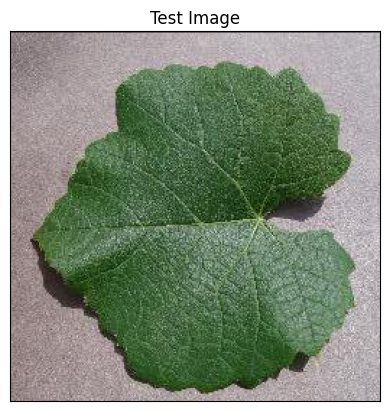

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

🔍 Raw Prediction Output: [[1.5589093e-06 5.4383440e-09 7.2023818e-07 9.9999774e-01]]

🔍 Class Probabilities: [1.5589093e-06 5.4383440e-09 7.2023818e-07 9.9999774e-01]

🔍 Predicted Class Index: 3


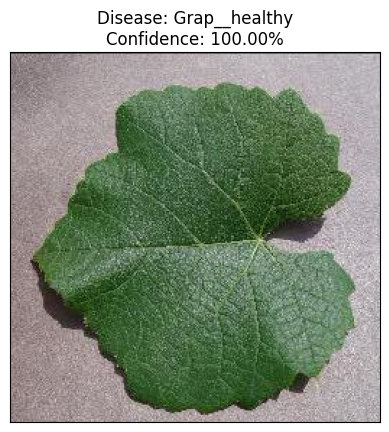


✅ Final Prediction Results:
🔹 Predicted Class: Grap__healthy
🔹 Confidence Score: 100.00%
🔹 Image Path: /content/grapes/test/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG


In [60]:
# Step 1: Import Necessary Libraries
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Step 2: Load the trained model
model_path = "/content/drive/MyDrive/trained_model.keras"
model = tf.keras.models.load_model(model_path)
time.sleep(2)  # Wait to ensure the model is fully loaded

# Step 3: Define Image Path
image_path = "/content/grapes/test/0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG"

# Step 4: Read Image for Display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 5: Preprocess Image for Model
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to batch

# DO NOT normalize if training did not use normalization
# input_arr /= 255.0  # (Commented out)

# Step 6: Make Prediction
prediction = model.predict(input_arr)

# Step 7: Debugging - Print Raw Predictions
print("\n🔍 Raw Prediction Output:", prediction)
print("\n🔍 Class Probabilities:", prediction[0])  # Full probability distribution
print("\n🔍 Predicted Class Index:", np.argmax(prediction))

# Step 8: Get Predicted Class
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

result_index = np.argmax(prediction)
confidence = float(np.max(prediction))  # Confidence score
model_prediction = class_name[result_index]

# Step 9: Display Prediction Results
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2%}")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 10: Print Final Results
print("\n✅ Final Prediction Results:")
print(f"🔹 Predicted Class: {model_prediction}")
print(f"🔹 Confidence Score: {confidence:.2%}")  # Prints confidence in percentage
print(f"🔹 Image Path: {image_path}")


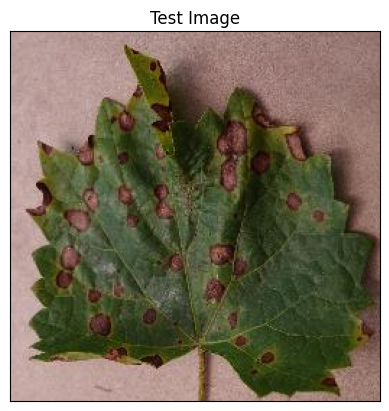

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step

🔍 Raw Prediction Output: [[9.7698498e-01 2.2899482e-02 1.1555715e-04 1.2705000e-09]]

🔍 Class Probabilities: [9.7698498e-01 2.2899482e-02 1.1555715e-04 1.2705000e-09]

🔍 Predicted Class Index: 0


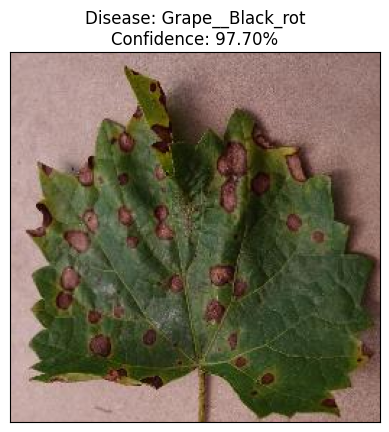


✅ Final Prediction Results:
🔹 Predicted Class: Grape__Black_rot
🔹 Confidence Score: 97.70%
🔹 Image Path: /content/grapes/test/4d8eb211-0ad4-4cac-be0a-56d5d0ad9d8e___FAM_B.Rot 3008.JPG


In [62]:
# Step 1: Import Necessary Libraries
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Step 2: Load the trained model
model_path = "/content/drive/MyDrive/trained_model.keras"
model = tf.keras.models.load_model(model_path)
time.sleep(2)  # Wait to ensure the model is fully loaded

# Step 3: Define Image Path
image_path = "/content/grapes/test/4d8eb211-0ad4-4cac-be0a-56d5d0ad9d8e___FAM_B.Rot 3008.JPG"

# Step 4: Read Image for Display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 5: Preprocess Image for Model
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to batch

# DO NOT normalize if training did not use normalization
# input_arr /= 255.0  # (Commented out)

# Step 6: Make Prediction
prediction = model.predict(input_arr)

# Step 7: Debugging - Print Raw Predictions
print("\n🔍 Raw Prediction Output:", prediction)
print("\n🔍 Class Probabilities:", prediction[0])  # Full probability distribution
print("\n🔍 Predicted Class Index:", np.argmax(prediction))

# Step 8: Get Predicted Class
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

result_index = np.argmax(prediction)
confidence = float(np.max(prediction))  # Confidence score
model_prediction = class_name[result_index]

# Step 9: Display Prediction Results
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2%}")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 10: Print Final Results
print("\n✅ Final Prediction Results:")
print(f"🔹 Predicted Class: {model_prediction}")
print(f"🔹 Confidence Score: {confidence:.2%}")  # Prints confidence in percentage
print(f"🔹 Image Path: {image_path}")


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


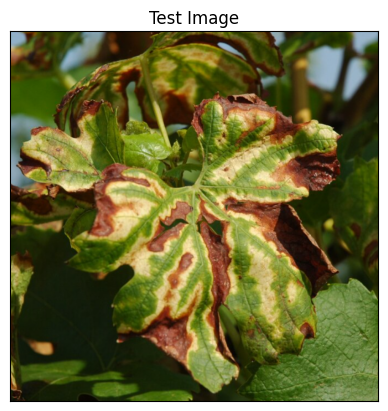

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step

🔍 Raw Prediction Output: [[7.6819626e-03 2.8396106e-01 7.0835698e-01 8.2628007e-13]]

🔍 Class Probabilities: [7.6819626e-03 2.8396106e-01 7.0835698e-01 8.2628007e-13]

🔍 Predicted Class Index: 2


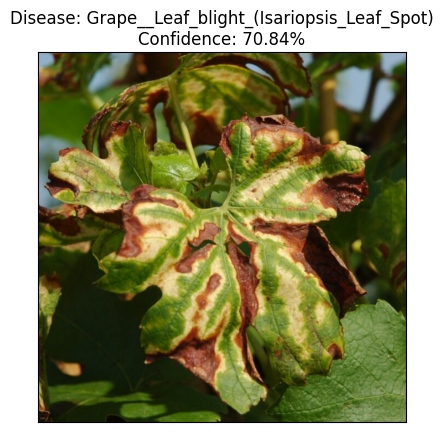


✅ Final Prediction Results:
🔹 Predicted Class: Grape__Leaf_blight_(Isariopsis_Leaf_Spot)
🔹 Confidence Score: 70.84%
🔹 Image Path: /Screenshot 2025-04-10 001200.png


In [65]:
# Step 1: Import Necessary Libraries
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Step 2: Load the trained model
model_path = "/content/drive/MyDrive/trained_model.keras"
model = tf.keras.models.load_model(model_path)
time.sleep(2)  # Wait to ensure the model is fully loaded

# Step 3: Define Image Path
image_path = "/Screenshot 2025-04-10 001200.png"

# Step 4: Read Image for Display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 5: Preprocess Image for Model
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to batch

# DO NOT normalize if training did not use normalization
# input_arr /= 255.0  # (Commented out)

# Step 6: Make Prediction
prediction = model.predict(input_arr)

# Step 7: Debugging - Print Raw Predictions
print("\n🔍 Raw Prediction Output:", prediction)
print("\n🔍 Class Probabilities:", prediction[0])  # Full probability distribution
print("\n🔍 Predicted Class Index:", np.argmax(prediction))

# Step 8: Get Predicted Class
class_name=['Grape__Black_rot',
 'Grape__Esca_(Black_Measles)',
 'Grape__Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grap__healthy']

result_index = np.argmax(prediction)
confidence = float(np.max(prediction))  # Confidence score
model_prediction = class_name[result_index]

# Step 9: Display Prediction Results
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nConfidence: {confidence:.2%}")
plt.xticks([])
plt.yticks([])
plt.show()

# Step 10: Print Final Results
print("\n✅ Final Prediction Results:")
print(f"🔹 Predicted Class: {model_prediction}")
print(f"🔹 Confidence Score: {confidence:.2%}")  # Prints confidence in percentage
print(f"🔹 Image Path: {image_path}")
